### Import libraries

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Import all the datasets and perform the preliminary inspection
### - Check for missing values and duplicates
### - Remove any anomalies found in the data

In [2]:
tourism_with_id = pd.read_excel('Datasets/Capstone 2/Part 2/tourism_with_id.xlsx')
tourism_rating = pd.read_csv('Datasets/Capstone 2/Part 2/tourism_rating.csv')
user = pd.read_csv('Datasets/Capstone 2/Part 2/user.csv')

In [3]:
tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [4]:
tourism_with_id.info() # Unnamed: 11 is an empty column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [5]:
tourism_with_id.isna().sum() # Even Time_Minutes has significant NULL values

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [6]:
tourism_with_id.duplicated().sum() # No duplicates

0

In [7]:
tourism_with_id.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [8]:
# Remove the following 4 columns - 
# Unnamed: 11 : empty column
# Unnamed: 12 : contains just serial numbers
# Time_Minutes : significant missing values
# Coordinate : contains redundant information on latitude and longitude 
tourism_with_id.drop(columns = ['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Coordinate'], inplace = True)

In [9]:
tourism_with_id.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Lat          437 non-null    float64
 8   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 30.9+ KB


In [10]:
tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
tourism_rating.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [12]:
tourism_rating.duplicated().sum() # 79 duplicates

79

In [13]:
tourism_rating_cleaned = tourism_rating.drop_duplicates() # Drop duplicate rows
tourism_rating_cleaned.duplicated().sum()

0

In [14]:
tourism_rating_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        9921 non-null   int64
 1   Place_Id       9921 non-null   int64
 2   Place_Ratings  9921 non-null   int64
dtypes: int64(3)
memory usage: 310.0 KB


In [15]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
user.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [17]:
user.duplicated().sum() # No duplicates

0

## Data exploration
### The age distribution of users visiting the places and giving the ratings

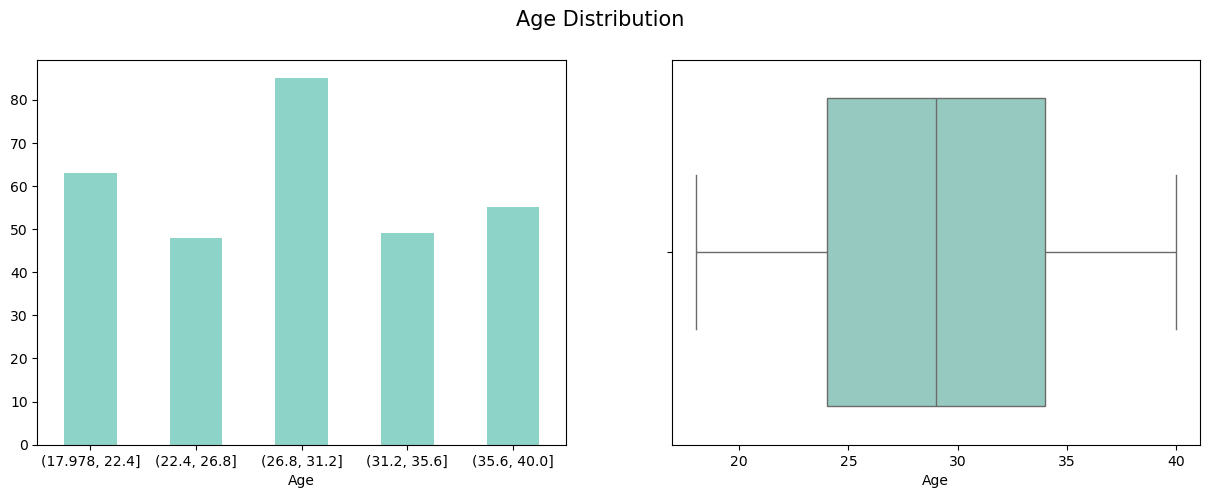

In [18]:
sns.set_palette("Set3")

f, ax = plt.subplots(1,2, figsize = (15,5))
age_groups = pd.cut(user.Age, bins = 5, )
vc = age_groups.value_counts()
vc = vc.sort_index()
vc.plot.bar(ax = ax[0])
sns.boxplot(x = user.Age, ax = ax[1])
ax[0].set_xticklabels(labels = vc.index, rotation = 0, )
plt.suptitle("Age Distribution", size = 15)
plt.show()

### What are the places from where most of these users (tourists) are coming from?

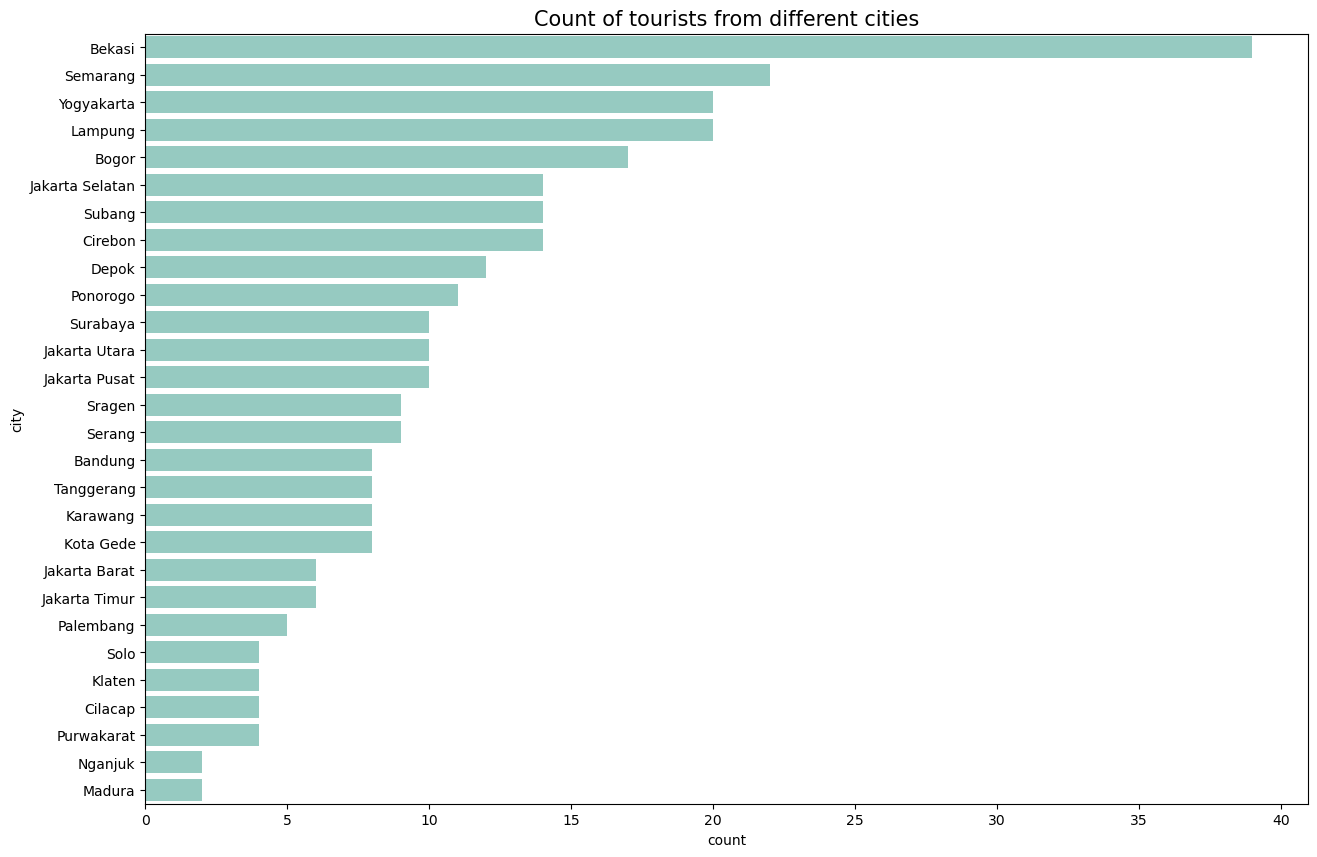

In [19]:
user['city'] = user.Location.apply(lambda x: x.split(",")[0])
vc = user.city.value_counts()
plt.figure(figsize = (15,10))
plt.title("Count of tourists from different cities", size = 15)
sns.countplot(y = "city", data = user, order = vc.index)
plt.show() # Most of the tourists come from Bekasi

### What are the different categories of tourist spots?

Budaya → Culture

Taman Hiburan → Amusement Park

Cagar Alam → Nature Reserve

Bahari → Marine / Maritime

Pusat Perbelanjaan → Shopping Center / Mall

Tempat Ibadah → Place of Worship

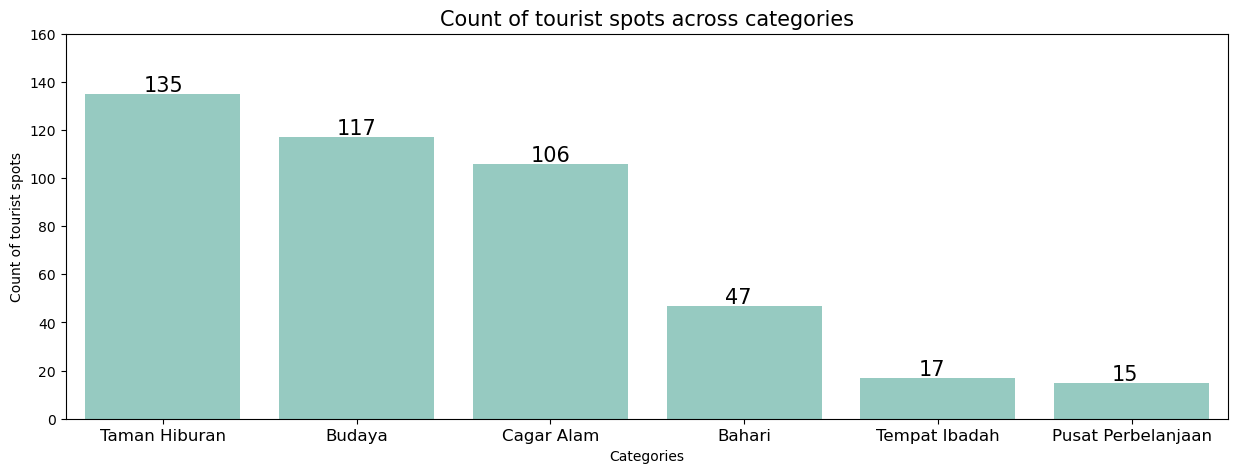

In [20]:
vc = tourism_with_id.Category.value_counts()
plt.figure(figsize = (15,5))
sns.countplot(x = tourism_with_id.Category, order = vc.index)
i = 0
for i, count in enumerate(vc):
    plt.annotate(count, xy=(i - 0.1, count + 1), size=15)
plt.xlabel('Categories')
plt.ylabel('Count of tourist spots')
plt.ylim(0, 20 * round(vc.max()/20)+20)
plt.xticks(size = 12)
plt.title("Count of tourist spots across categories", size = 15)
plt.show()

### What kind of tourism each city/location most famous or suitable for?

In [21]:
tourism_with_id.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

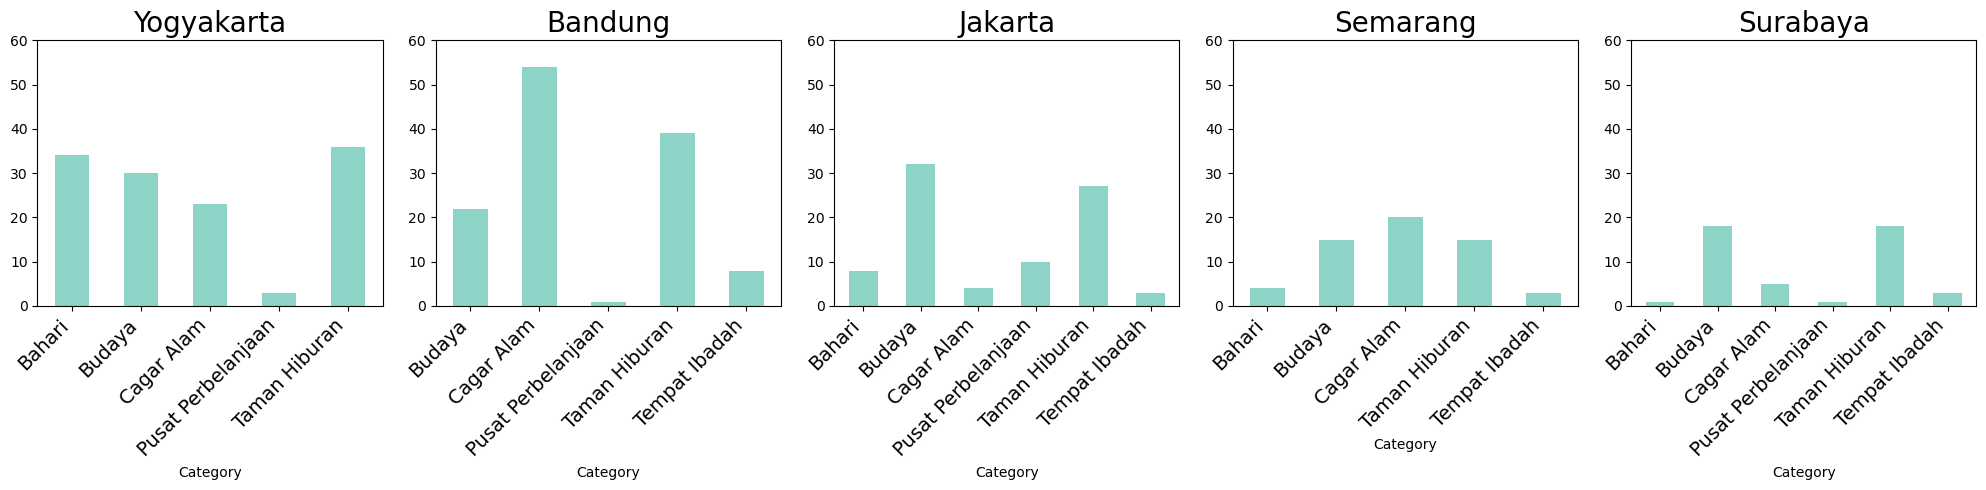

In [22]:
f, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, c in enumerate(tourism_with_id.City.value_counts().index):
    temp = tourism_with_id[tourism_with_id.City == c]
    vc = temp.Category.value_counts().sort_index()

    vc.plot.bar(stacked=True, ax=ax[i])

    ax[i].set_ylabel("")
    ax[i].set_ylim(0, 60)
    ax[i].set_title(c, size=20)

    ax[i].set_xticks(range(len(vc)))
    ax[i].set_xticklabels(vc.index, rotation=45, fontsize=14, ha='right')

plt.tight_layout()
plt.show()

### Which city would be best for a nature enthusiast to visit?

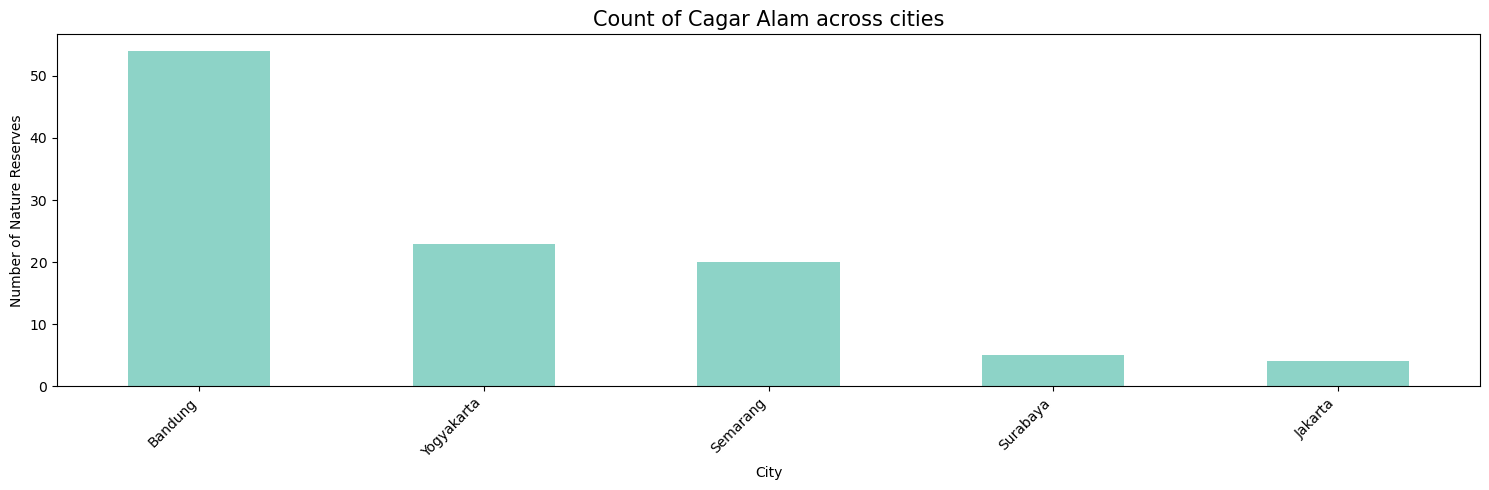

In [23]:
vc = tourism_with_id[tourism_with_id.Category == "Cagar Alam"].City.value_counts()

plt.figure(figsize=(15, 5))
vc.plot.bar()

plt.xlabel("City")
plt.ylabel("Number of Nature Reserves")
plt.title("Count of Cagar Alam across cities", size = 15)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show() # Bandung is the best for a nature enthusiast

### Combined data with places and their ratings

In [24]:
ratings = tourism_rating_cleaned.groupby('Place_Id')[['Place_Ratings']].mean().round(2).reset_index() # weighted average ratings for each place
place_ratings = pd.merge(tourism_with_id,ratings, on = 'Place_Id', how = "left")
place_ratings.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153,3.72
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,-6.137645,106.817125,2.84
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,-6.125312,106.833538,2.53
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,-6.302446,106.895156,2.86
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,-6.124190,106.839134,3.52


### Figure out the spots that are most loved by the tourists

In [25]:
place_ratings.sort_values("Place_Ratings",ascending = False).head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,Place_Ratings
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.256755,112.794220,3.93
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,-7.841253,110.543056,3.88
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,-6.365136,106.761798,3.84
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.884420,107.606834,3.79
321,322,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,-7.195110,107.431281,3.79


### Which city has the most loved tourist spots?

In [26]:
# Picking up the places with average rating above 3.5 as most loved places and finding the corresponding cities
vc = place_ratings[place_ratings.Place_Ratings > 3.5].City.value_counts()
vc # Bandung and Yogyakarta have the most loved tourist spots

City
Yogyakarta    10
Bandung       10
Jakarta        6
Surabaya       3
Semarang       1
Name: count, dtype: int64

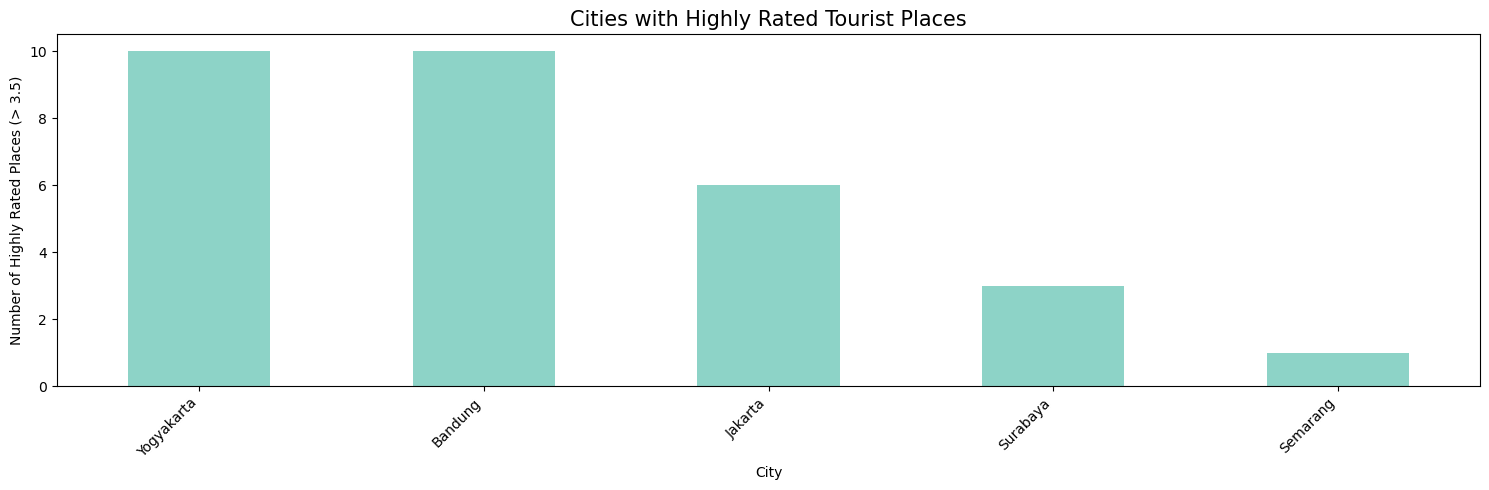

In [27]:
plt.figure(figsize=(15, 5))
vc.plot.bar()

plt.xlabel("City")
plt.ylabel("Number of Highly Rated Places (> 3.5)")
plt.title("Cities with Highly Rated Tourist Places", size = 15)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### What category of places are users liking the most?

In [28]:
# Picking up the places with average rating above 3.5 as most loved places and finding the corresponding categories
vc = place_ratings[place_ratings.Place_Ratings >3.5].Category.value_counts()
vc # Taman Hiburan is the most liked category of places

Category
Taman Hiburan    13
Cagar Alam        9
Budaya            6
Bahari            1
Tempat Ibadah     1
Name: count, dtype: int64

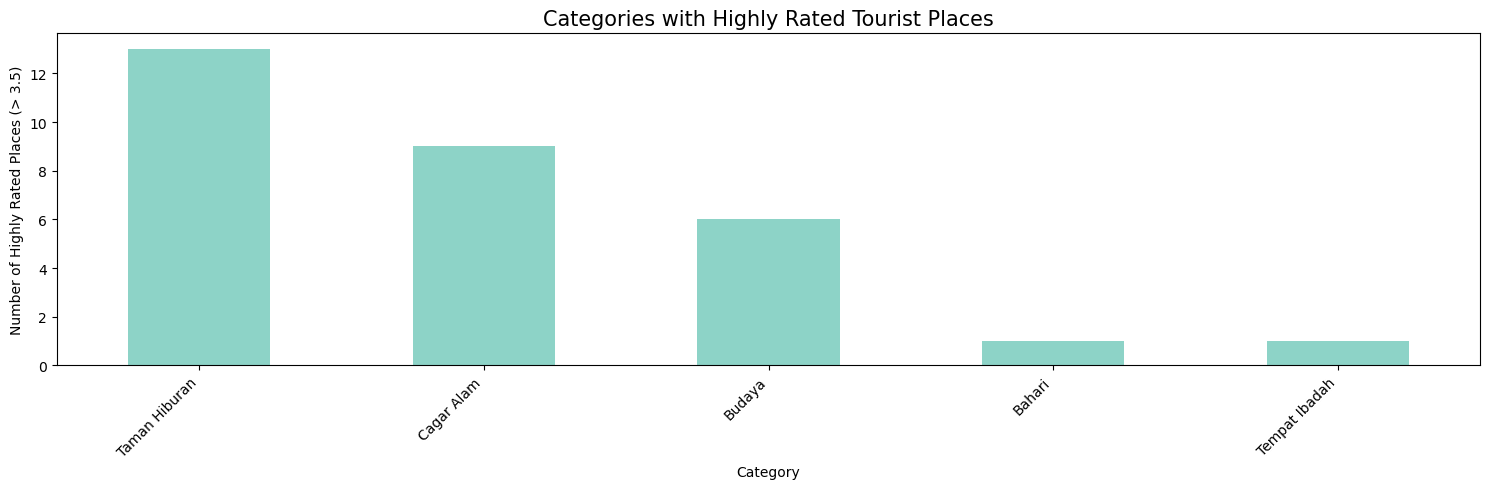

In [29]:
plt.figure(figsize=(15, 5))
vc.plot.bar()

plt.xlabel("Category")
plt.ylabel("Number of Highly Rated Places (> 3.5)")
plt.title("Categories with Highly Rated Tourist Places", size = 15)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Build a Recommender model
### Use the above data to develop a collaborative filtering model for recommendation and use that to recommend other places to visit using the current tourist location (place name)

In [41]:
# Prepare the data
# Average rating of each place per city
place_city_matrix = place_ratings.pivot_table(
    index="Place_Name",
    columns="City",
    values="Place_Ratings",
    aggfunc="mean"
)

# Fill missing values
place_city_matrix.fillna(0, inplace=True)
place_city_matrix

City,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta
Place_Name,,,,,
Air Mancur Menari,0.00,0.00,0.00,2.77,0.00
Air Terjun Kali Pancur,0.00,0.00,2.92,0.00,0.00
Air Terjun Kedung Pedut,0.00,0.00,0.00,0.00,3.59
Air Terjun Semirang,0.00,0.00,2.83,0.00,0.00
Air Terjun Sri Gethuk,0.00,0.00,0.00,0.00,2.95
...,...,...,...,...,...
Wisata Kraton Jogja,0.00,0.00,0.00,0.00,3.00
Wisata Kuliner Pecenongan,0.00,2.64,0.00,0.00,0.00
Wisata Lereng Kelir,0.00,0.00,3.29,0.00,0.00


In [43]:
data_norm = place_city_matrix.subtract(place_city_matrix.mean(axis=1), axis = 'rows')
data_norm

City,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta
Place_Name,,,,,
Air Mancur Menari,-0.554,-0.554,-0.554,2.216,-0.554
Air Terjun Kali Pancur,-0.584,-0.584,2.336,-0.584,-0.584
Air Terjun Kedung Pedut,-0.718,-0.718,-0.718,-0.718,2.872
Air Terjun Semirang,-0.566,-0.566,2.264,-0.566,-0.566
Air Terjun Sri Gethuk,-0.590,-0.590,-0.590,-0.590,2.360
...,...,...,...,...,...
Wisata Kraton Jogja,-0.600,-0.600,-0.600,-0.600,2.400
Wisata Kuliner Pecenongan,-0.528,2.112,-0.528,-0.528,-0.528
Wisata Lereng Kelir,-0.658,-0.658,2.632,-0.658,-0.658


In [44]:
# Compute Place-to-Place Similarity
# Cosine similarity between places
place_similarity = cosine_similarity(data_norm)

place_similarity_df = pd.DataFrame(
    place_similarity,
    index=place_city_matrix.index,
    columns=place_city_matrix.index
)
place_similarity_df 

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
Place_Name,,,,,,,,,,,,,,,,,,,,,
Air Mancur Menari,1.00,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
Air Terjun Kali Pancur,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,1.00,-0.25,1.00,-0.25,1.00,-0.25,-0.25,1.00,1.00,-0.25
Air Terjun Kedung Pedut,-0.25,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,...,-0.25,-0.25,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25
Air Terjun Semirang,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,1.00,-0.25,1.00,-0.25,1.00,-0.25,-0.25,1.00,1.00,-0.25
Air Terjun Sri Gethuk,-0.25,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,...,-0.25,-0.25,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisata Kraton Jogja,-0.25,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,1.00,-0.25,...,-0.25,-0.25,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25
Wisata Kuliner Pecenongan,-0.25,-0.25,-0.25,-0.25,-0.25,1.00,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,1.00,-0.25,-0.25,-0.25
Wisata Lereng Kelir,-0.25,1.00,-0.25,1.00,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,1.00,-0.25,1.00,-0.25,1.00,-0.25,-0.25,1.00,1.00,-0.25


In [45]:
# Recommendation function (Core)
def recommend_places(current_place, n_recommendations=5):
    if current_place not in place_similarity_df.index:
        return f"'{current_place}' not found in dataset."

    similarity_scores = (
        place_similarity_df[current_place]
        .sort_values(ascending=False)
        .drop(current_place)
        .head(n_recommendations)
    )

    return similarity_scores

In [48]:
# Get Recommendations (Example)
recommend_places("Tafso Barn")

Place_Name
Museum Konferensi Asia Afrika     1.0
Taman Hutan Raya Ir. H. Juanda    1.0
Taman Budaya Jawa Barat           1.0
Pemandian Air Panas Cimanggu      1.0
Kampung Batu Malakasari           1.0
Name: Tafso Barn, dtype: float64